In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytywanie danych

In [2]:
heart_failure_data = pd.read_csv("heart_failure.csv")

### Eksploracja danych

In [3]:
heart_failure_data.head(10)

,ID,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,0,40,140,289,172,0.0,0
1,1,49,160,180,156,1.0,1
2,2,37,130,283,98,0.0,0
3,3,48,138,214,108,1.5,1
4,4,54,150,195,122,0.0,0
5,5,39,120,339,170,0.0,0
6,6,45,130,237,170,0.0,0
7,7,54,110,208,142,0.0,0
8,8,37,140,207,130,1.5,1
9,9,48,120,284,120,0.0,0


In [4]:
heart_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            918 non-null    int64  
 1   Age           918 non-null    int64  
 2   RestingBP     918 non-null    int64  
 3   Cholesterol   918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


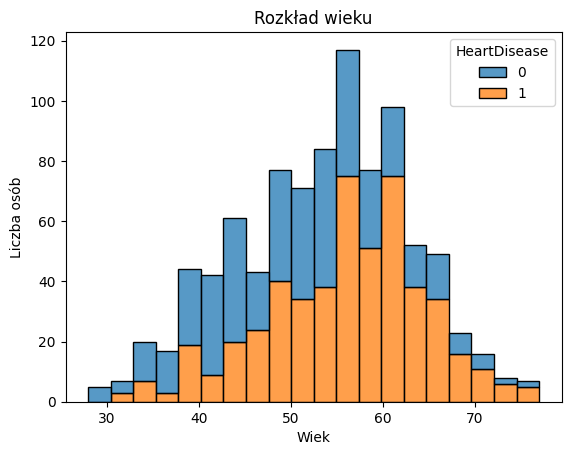

In [5]:
shuffled_heart_failure_data = heart_failure_data.sample(frac=1, random_state=42).reset_index(drop=True)

sns.histplot(data=shuffled_heart_failure_data, x='Age', hue='HeartDisease', multiple='stack', bins=20)
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.title('Rozkład wieku')
plt.show()

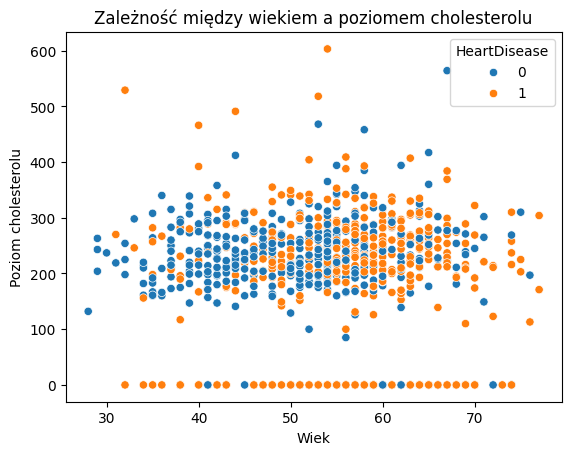

In [6]:
sns.scatterplot(data=shuffled_heart_failure_data, x='Age', y='Cholesterol', hue='HeartDisease')
plt.xlabel('Wiek')
plt.ylabel('Poziom cholesterolu')
plt.title('Zależność między wiekiem a poziomem cholesterolu')
plt.show()

### Podział zbioru

In [7]:
heart_failure_data_dropped = heart_failure_data.drop(columns=['ID'], inplace=False)
heart_failure_data_dropped

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0
...,...,...,...,...,...,...
913,45,110,264,132,1.2,1
914,68,144,193,141,3.4,1
915,57,130,131,115,1.2,1
916,57,130,236,174,0.0,1


In [8]:
heart_failure_data_selected = heart_failure_data_dropped[['Age', 'HeartDisease']]
heart_failure_data_selected

,Age,HeartDisease
0,40,0
1,49,1
2,37,0
3,48,1
4,54,0
...,...,...
913,45,1
914,68,1
915,57,1
916,57,1


#### Podział na zbiór testowy i treningowy

In [9]:
from sklearn.model_selection import train_test_split

X = heart_failure_data_dropped.drop(columns=['HeartDisease'])
y = heart_failure_data_dropped['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Trenowanie modelu

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=5)


In [11]:
k_neighbors_classifier.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [12]:
X_predictions = k_neighbors_classifier.predict(X_test)
X_predictions[:10]
y_test[:10]

668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
Name: HeartDisease, dtype: int64

In [13]:
y_test == X_predictions

668     True
30      True
377    False
535     True
807     True
       ...  
211     True
745    False
584     True
878     True
451     True
Name: HeartDisease, Length: 184, dtype: bool

In [14]:
np.sum(y_test == X_predictions)

np.int64(130)

In [15]:
np.sum(y_test == X_predictions) / len(y_test)

np.float64(0.7065217391304348)

### Sprawdzanie Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, X_predictions)
accuracy

0.7065217391304348

<Axes: xlabel='Age', ylabel='Count'>

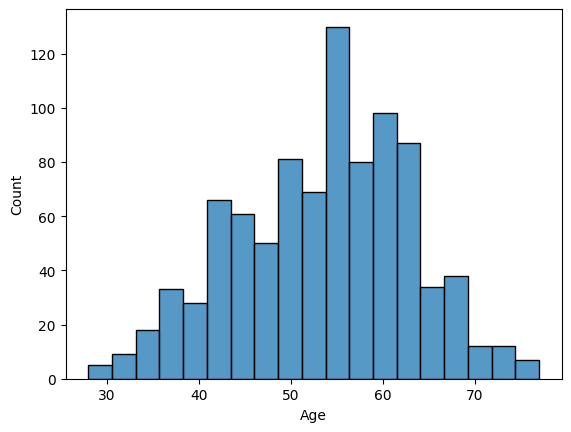

In [17]:
sns.histplot(data=heart_failure_data, x='Age')

In [18]:
np.sum(y_test == 1) / len(y_test)

np.float64(0.5815217391304348)

### Macierz pomyłek

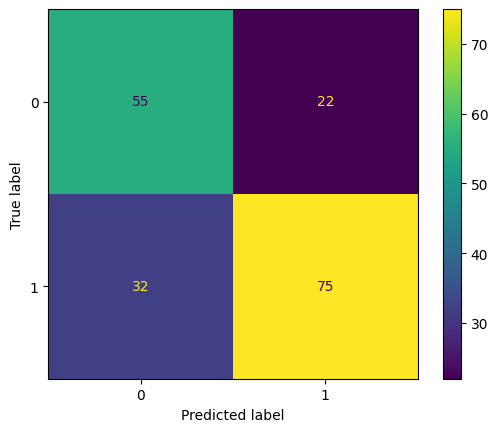

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, X_predictions)

### Precision Score i Recall Score modelu

In [20]:
from sklearn.metrics import recall_score, precision_score

precision_score(y_test, X_predictions)

0.7731958762886598

In [21]:
recall_score(y_test, X_predictions)

0.7009345794392523

In [22]:
# Precision Score i Recall Score obliczone ręcznie za pomocą wartości z macierzy pomyłek
TP = 75
FP = 22
FN = 32

precision = TP / (TP + FP)

recall = TP / (TP + FN)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")

Precision Score: 0.7731958762886598
Recall Score: 0.7009345794392523


### F1 Score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, X_predictions)

0.7352941176470589

### Wykres Precision & Recall Score

In [24]:
from sklearn.metrics import precision_recall_curve


y_proba_knn = k_neighbors_classifier.predict_proba(X_test)[:, 1]
knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_test, y_proba_knn)

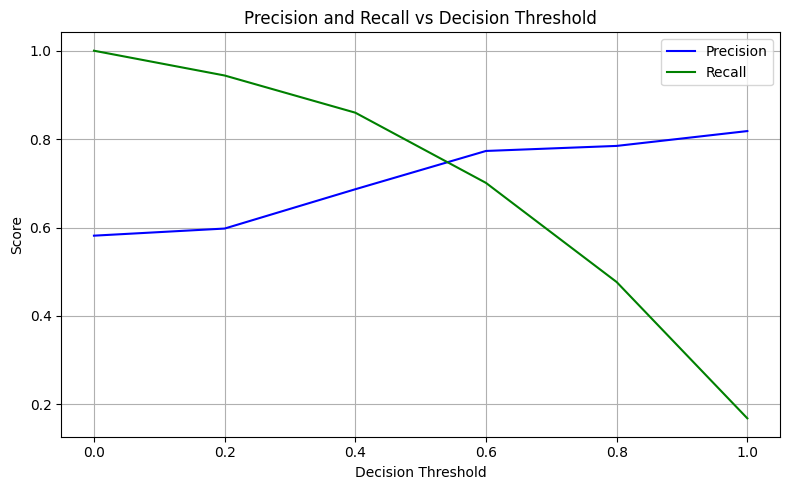

In [25]:
plt.figure(figsize=(8, 5))
plt.plot( knn_thresholds, knn_precisions[:-1], label="Precision", color="blue")
plt.plot(knn_thresholds, knn_recalls[:-1], label="Recall", color="green")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

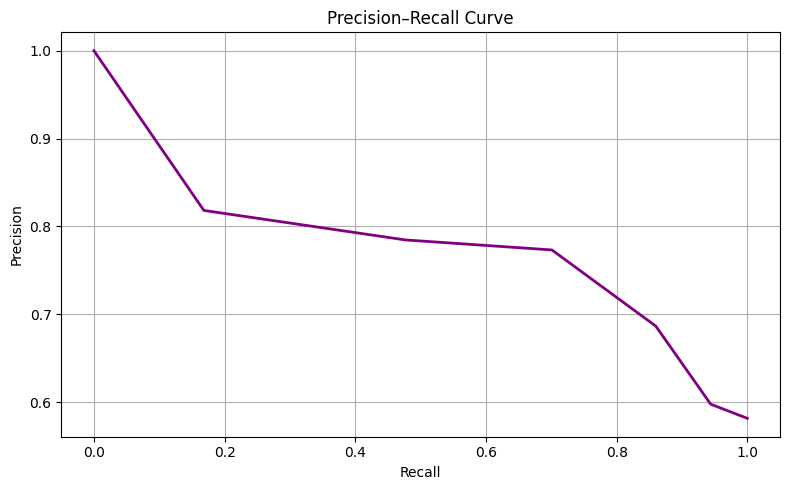

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

### Model LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [28]:
logistic_regression_model_predictions = logistic_regression_model.predict(X_test)

### Wyniki modelu LogisticRegression

In [29]:
print("Accuracy:", accuracy_score(y_test, logistic_regression_model_predictions))
print("Recall:", recall_score(y_test, logistic_regression_model_predictions))
print("Precision:", precision_score(y_test, logistic_regression_model_predictions))
print("F1:", f1_score(y_test, logistic_regression_model_predictions))

Accuracy: 0.717391304347826
Recall: 0.7289719626168224
Precision: 0.7722772277227723
F1: 0.75


### Model DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [31]:
decision_tree_classifier_predictions = decision_tree_classifier.predict(X_test)

### Wyniki modelu DecisionThreeClassifier

In [32]:
print("Accuracy:", accuracy_score(y_test, decision_tree_classifier_predictions))
print("Recall:", recall_score(y_test, decision_tree_classifier_predictions))
print("Precision:", precision_score(y_test, decision_tree_classifier_predictions))
print("F1:", f1_score(y_test, decision_tree_classifier_predictions))

Accuracy: 0.6902173913043478
Recall: 0.7289719626168224
Precision: 0.7358490566037735
F1: 0.7323943661971831


### Model GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb_classifier = GaussianNB()
gaussian_nb_classifier.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [34]:
gaussian_nb_classifier_predictions = gaussian_nb_classifier.predict(X_test)

### Wyniki modelu GaussianNB

In [35]:
print("Accuracy:", accuracy_score(y_test, gaussian_nb_classifier_predictions))
print("Recall:", recall_score(y_test, gaussian_nb_classifier_predictions))
print("Precision:", precision_score(y_test, gaussian_nb_classifier_predictions))
print("F1:", f1_score(y_test, gaussian_nb_classifier_predictions))

Accuracy: 0.7445652173913043
Recall: 0.7383177570093458
Precision: 0.8061224489795918
F1: 0.7707317073170732


### Model SVC

In [36]:
from sklearn.svm import SVC

svc_classifier = SVC(probability=True, random_state=42)
svc_classifier.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [37]:
svc_classifier_predictions = svc_classifier.predict(X_test)

### Wyniki modelu SVC

In [38]:
print("Accuracy:", accuracy_score(y_test, svc_classifier_predictions))
print("Recall:", recall_score(y_test, svc_classifier_predictions))
print("Precision:", precision_score(y_test, svc_classifier_predictions))
print("F1:", f1_score(y_test, svc_classifier_predictions))

Accuracy: 0.6739130434782609
Recall: 0.6448598130841121
Precision: 0.7582417582417582
F1: 0.696969696969697


### Decision Threshold

Klasy w modelu: [0 1]
Przykładowe prawdopodobieństwa choroby (pierwsze 5): [0.2 0.6 0.4 0.8 0.2]

--- WYNIKI DLA PROGU 0.3 ---
Precision (Precyzja): 0.6865671641791045
Recall (Czułość):      0.8598130841121495

Macierz pomyłek dla nowego progu:


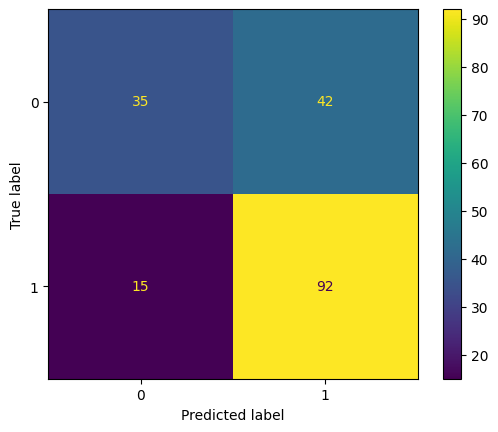

In [39]:
model_do_analizy = k_neighbors_classifier

y_proba = model_do_analizy.predict_proba(X_test)

print(f"Klasy w modelu: {model_do_analizy.classes_}")

y_proba_positive = y_proba[:, 1]
print(f"Przykładowe prawdopodobieństwa choroby (pierwsze 5): {y_proba_positive[:5]}")

moj_prog = 0.3

y_pred_moj_prog = (y_proba_positive >= moj_prog).astype(int)


print(f"\n--- WYNIKI DLA PROGU {moj_prog} ---")
print("Precision (Precyzja):", precision_score(y_test, y_pred_moj_prog))
print("Recall (Czułość):     ", recall_score(y_test, y_pred_moj_prog))

print("\nMacierz pomyłek dla nowego progu:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_moj_prog)

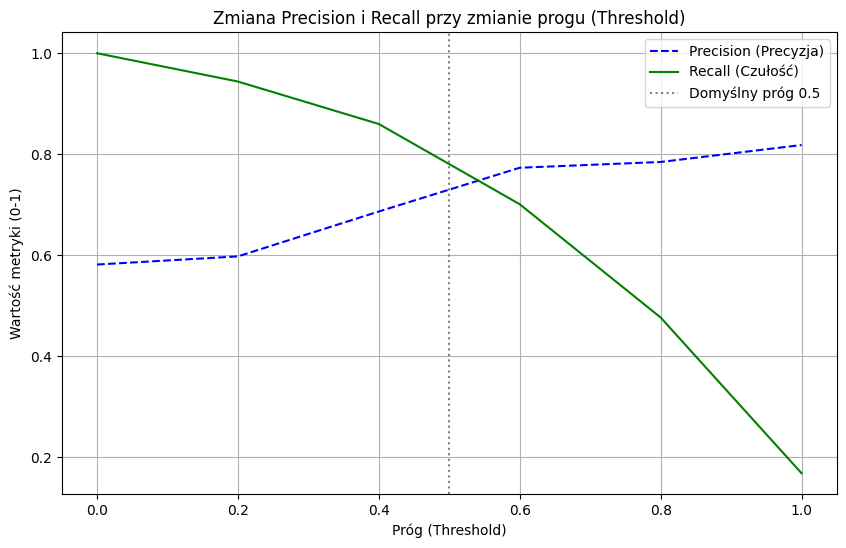

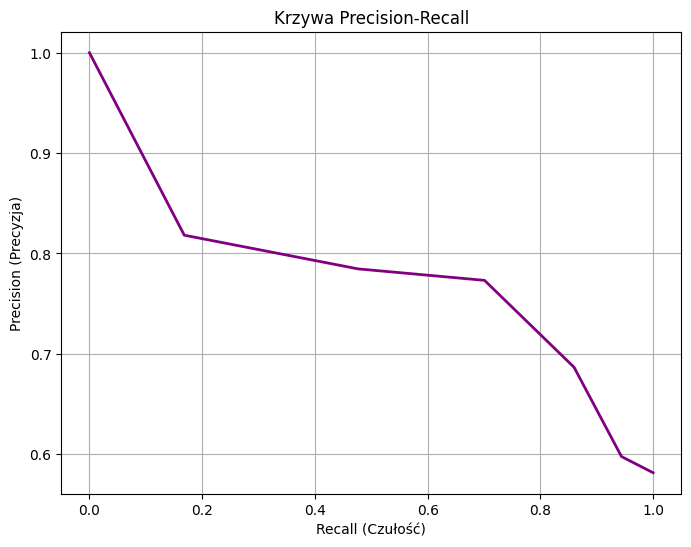

In [40]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_positive)

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision (Precyzja)")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall (Czułość)")

plt.title("Zmiana Precision i Recall przy zmianie progu (Threshold)")
plt.xlabel("Próg (Threshold)")
plt.ylabel("Wartość metryki (0-1)")
plt.axvline(x=0.5, color='gray', linestyle=':', label='Domyślny próg 0.5') # Linia pomocnicza
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='purple', lw=2)

plt.title("Krzywa Precision-Recall")
plt.xlabel("Recall (Czułość)")
plt.ylabel("Precision (Precyzja)")
plt.grid(True)
plt.show()

### Wykres Precision & Recall Score

In [41]:
knn_probabilities = k_neighbors_classifier.predict_proba(X_test)[:, 1]

knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_test, knn_probabilities) 

In [42]:
logistic_regression_probabilities = logistic_regression_model.predict_proba(X_test)[:, 1]

lr_precisions, lr_recalls, lr_thresholds = precision_recall_curve(y_test, logistic_regression_probabilities)

In [43]:
decision_tree_classifier_probabilities = decision_tree_classifier.predict_proba(X_test)[:, 1]

dt_precisions, dt_recalls, dt_thresholds = precision_recall_curve(y_test, decision_tree_classifier_probabilities)

In [44]:
gaussian_nb_classifier_probabilities = gaussian_nb_classifier.predict_proba(X_test)[:, 1]

gnb_precisions, gnb_recalls, gnb_thresholds = precision_recall_curve(y_test, gaussian_nb_classifier_probabilities)

In [45]:
svc_classifier_probabilities = svc_classifier.predict_proba(X_test)[:, 1]

svc_precisions, svc_recalls, svc_thresholds = precision_recall_curve(y_test, svc_classifier_probabilities)

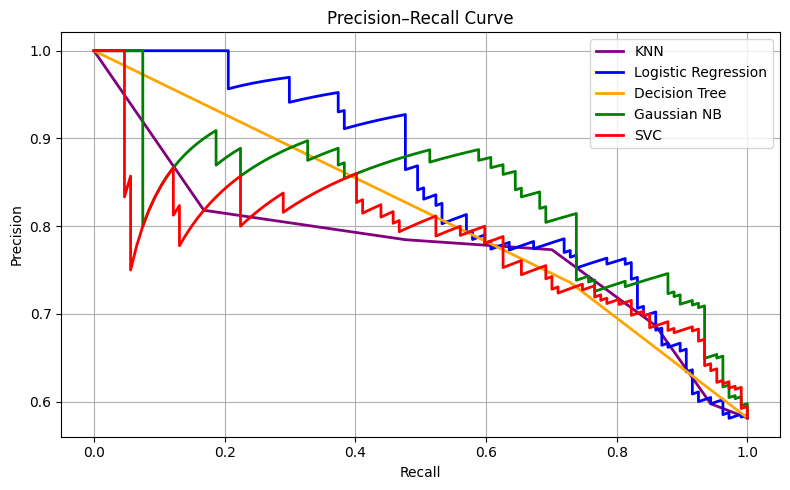

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(knn_recalls, knn_precisions, color="purple", lw=2, label="KNN")
plt.plot(lr_recalls, lr_precisions, color="blue", lw=2, label="Logistic Regression")
plt.plot(dt_recalls, dt_precisions, color="orange", lw=2, label="Decision Tree")
plt.plot(gnb_recalls, gnb_precisions, color="green", lw=2, label="Gaussian NB")
plt.plot(svc_recalls, svc_precisions, color="red", lw=2, label="SVC")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()